In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.keras import layers
import os 
import PIL
import time

In [35]:
dataset_name = 'diabetic_retinopathy_detection/btgraham-300'
subdataset_name = 'btgraham-300'
print(dataset_name)

diabetic_retinopathy_detection/btgraham-300


In [36]:
BATCH_SIZE = 256

In [37]:
tfds.__version__

'3.0.0'

In [38]:

dataset, info= tfds.load(dataset_name,split=tfds.Split.TRAIN, download=True, with_info=True)
#dataset = dataset.map(lambda image: tf.image.resize_with_crop_or_pad(image, 64, 64))
print(type(dataset))


<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


In [45]:
print(dataset.__len__())
print(dataset.get_shape())

tf.Tensor(35126, shape=(), dtype=int64)


AttributeError: 'PrefetchDataset' object has no attribute 'get_shape'

In [47]:
print(dataset.__len__())

tf.Tensor(35126, shape=(), dtype=int64)


In [44]:
def asd(im):
  count = 0
  print(im['image'].get_shape())
  #for key, value in im.items() :
  #  count = count + 1
  #  if (count > 0):
  #    print (key, value)
  return im

dataset.map(asd)

(None, None, 3)


<MapDataset shapes: {image: (None, None, 3), label: (), name: ()}, types: {image: tf.uint8, label: tf.int64, name: tf.string}>

In [33]:
for image in dataset.take(5):
  count = 0
  print(image['image'].get_shape())
  #for key, value in image.items() :
  #  count = count + 1
  #  if (count > 0):
  #    print (key, value)
  count = 0

(540, 540, 3)
(462, 540, 3)
(474, 540, 3)
(540, 540, 3)
(464, 540, 3)


In [ ]:
#input_reSizer = tf.keras.Sequential()
#input_reSizer.add(layers.Reshape((3,64,64)))
#for image_batch in dataset:
#  input_reSizer(image_batch
dataset = dataset.map(lambda image: tf.image.resize_with_crop_or_pad(image, 64, 64))
#train_dataset = dataset.batch(BATCH_SIZE)


TypeError: in user code:

    /tmp/ipykernel_164238/3998610235.py:6 None  *
        lambda image: tf.image.resize_with_crop_or_pad(image, 64, 64)
    /home/juan/.local/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper  **
        return target(*args, **kwargs)
    /home/juan/.local/lib/python3.8/site-packages/tensorflow/python/ops/image_ops_impl.py:1272 resize_image_with_crop_or_pad
        image = ops.convert_to_tensor(image, name='image')
    /home/juan/.local/lib/python3.8/site-packages/tensorflow/python/profiler/trace.py:163 wrapped
        return func(*args, **kwargs)
    /home/juan/.local/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:1566 convert_to_tensor
        ret = conversion_func(value, dtype=dtype, name=name, as_ref=as_ref)
    /home/juan/.local/lib/python3.8/site-packages/tensorflow/python/framework/constant_op.py:346 _constant_tensor_conversion_function
        return constant(v, dtype=dtype, name=name)
    /home/juan/.local/lib/python3.8/site-packages/tensorflow/python/framework/constant_op.py:271 constant
        return _constant_impl(value, dtype, shape, name, verify_shape=False,
    /home/juan/.local/lib/python3.8/site-packages/tensorflow/python/framework/constant_op.py:288 _constant_impl
        tensor_util.make_tensor_proto(
    /home/juan/.local/lib/python3.8/site-packages/tensorflow/python/framework/tensor_util.py:457 make_tensor_proto
        _AssertCompatible(values, dtype)
    /home/juan/.local/lib/python3.8/site-packages/tensorflow/python/framework/tensor_util.py:334 _AssertCompatible
        raise TypeError("Expected any non-tensor type, got a tensor instead.")

    TypeError: Expected any non-tensor type, got a tensor instead.


In [ ]:
info

tfds.core.DatasetInfo(
    name='diabetic_retinopathy_detection',
    full_name='diabetic_retinopathy_detection/btgraham-300/3.0.0',
    description="""
    A large set of high-resolution retina images taken under a variety of imaging conditions.
    """,
    config_description="""
    Images have been preprocessed as the winner of the Kaggle competition did in 2015: first they are resized so that the radius of an eyeball is 300 pixels, then they are cropped to 90% of the radius, and finally they are encoded with 72 JPEG quality.
    """,
    homepage='https://www.kaggle.com/c/diabetic-retinopathy-detection/data',
    data_path='/home/juan/tensorflow_datasets/diabetic_retinopathy_detection/btgraham-300/3.0.0',
    download_size=1.13 MiB,
    dataset_size=3.64 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
        'name': Text(shape=(), dtype=tf.string),
    }),
    sup

In [ ]:
def make_generator_model():
  aKernelSize = 5
  aStrides = 2
  z_dim = 100

  layersInfo = [(4, 1024), (8, 512), (16,256), (32, 128), (64, 3)]
  
  layer_0 = (4, 1024)
  model = tf.keras.Sequential()
  model.add(layers.Dense(layer_0[0] ** 2 * layer_0[1], use_bias=False, input_shape=(z_dim,)))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  
  model.add(layers.Reshape((layer_0[0], layer_0[0], layer_0[1])))
  print(model.output_shape)
  assert model.output_shape == (None, layer_0[0], layer_0[0], layer_0[1])  # Note: None is the batch size

  layer_1 = layersInfo[1]
  model.add(layers.Conv2DTranspose(layer_1[1], kernel_size=aKernelSize, strides=aStrides, padding='same', use_bias=False))
  print(model.output_shape)
  assert model.output_shape == (None, layer_1[0], layer_1[0], layer_1[1])
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  layer_2 = layersInfo[2]
  model.add(layers.Conv2DTranspose(layer_2[1], kernel_size=aKernelSize, strides=aStrides, padding='same', use_bias=False))
  assert model.output_shape == (None, layer_2[0], layer_2[0], layer_2[1])
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  layer_3 = layersInfo[3]
  model.add(layers.Conv2DTranspose(layer_3[1], kernel_size=aKernelSize, strides=aStrides, padding='same', use_bias=False))
  assert model.output_shape == (None, layer_3[0], layer_3[0], layer_3[1])
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  layer_4 = layersInfo[4]
  model.add(layers.Conv2DTranspose(layer_4[1], kernel_size=aKernelSize, strides=aStrides, padding='same', use_bias=False, activation='tanh'))
  assert model.output_shape == (None, layer_4[0], layer_4[0], layer_4[1])

  return model

(None, 4, 4, 1024)
(None, 8, 8, 512)


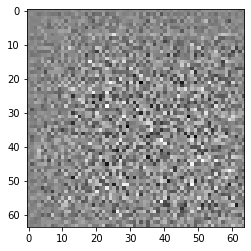

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [ ]:
make_generator_model()

(None, 4, 4, 1024)
(None, 8, 8, 512)


In [ ]:
def make_discriminator_model():
  aKernelSize = 5
  aStrides = 2
  dropOutRatio = 0.3

  layersInfo = [(32, 64), (16,128), (8, 256), (4, 512)]
  
  model = tf.keras.Sequential()
  
  layer_0 = layersInfo[0]
  model.add(layers.Conv2D(layer_0[1], kernel_size=aKernelSize, strides=aStrides, padding='same', input_shape=[64, 64, 3]))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(dropOutRatio))

  layer_1 = layersInfo[1]
  model.add(layers.Conv2D(layer_1[1], kernel_size=aKernelSize, strides=aStrides, padding='same'))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(dropOutRatio))

  layer_2 = layersInfo[2]
  model.add(layers.Conv2D(layer_2[1], kernel_size=aKernelSize, strides=aStrides, padding='same'))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(dropOutRatio))

  layer_3 = layersInfo[3]
  model.add(layers.Conv2D(layer_3[1], kernel_size=aKernelSize, strides=aStrides, padding='same'))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(dropOutRatio))

  model.add(layers.Flatten())
  model.add(layers.Dense(1))

  return model

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.0001704]], shape=(1, 1), dtype=float32)


In [ ]:
print(discriminator.layers)

[<keras.layers.convolutional.Conv2D object at 0x7f0472144250>, <keras.layers.advanced_activations.LeakyReLU object at 0x7f047214bbe0>, <keras.layers.core.Dropout object at 0x7f0472155ca0>, <keras.layers.convolutional.Conv2D object at 0x7f047216ab20>, <keras.layers.advanced_activations.LeakyReLU object at 0x7f047216a850>, <keras.layers.core.Dropout object at 0x7f0472155bb0>, <keras.layers.convolutional.Conv2D object at 0x7f047215c550>, <keras.layers.advanced_activations.LeakyReLU object at 0x7f047215cd60>, <keras.layers.core.Dropout object at 0x7f047216a670>, <keras.layers.convolutional.Conv2D object at 0x7f0472160a90>, <keras.layers.advanced_activations.LeakyReLU object at 0x7f0472157bb0>, <keras.layers.core.Dropout object at 0x7f0472170be0>, <keras.layers.core.Flatten object at 0x7f0472170c40>, <keras.layers.core.Dense object at 0x7f04721606d0>]


In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
learing_rate = 1e-4
generator_optimizer = tf.keras.optimizers.Adam(learing_rate)
discriminator_optimizer = tf.keras.optimizers.Adam(learing_rate)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch

In [ ]:
train(train_dataset, EPOCHS)

2021-10-07 22:27:51.907293: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


InvalidArgumentError: Cannot batch tensors with different shapes in component 0. First element had shape [540,540,3] and element 1 had shape [462,540,3]. [Op:IteratorGetNext]